<a href="https://colab.research.google.com/github/habaruh/AZ-103-MicrosoftAzureAdministrator/blob/master/Solucion_Pytonh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estado: Optimal
Producción óptima:
Producto A: 66.666667 unidades
Producto B: 26.666667 unidades
Beneficio máximo: $5466.66671


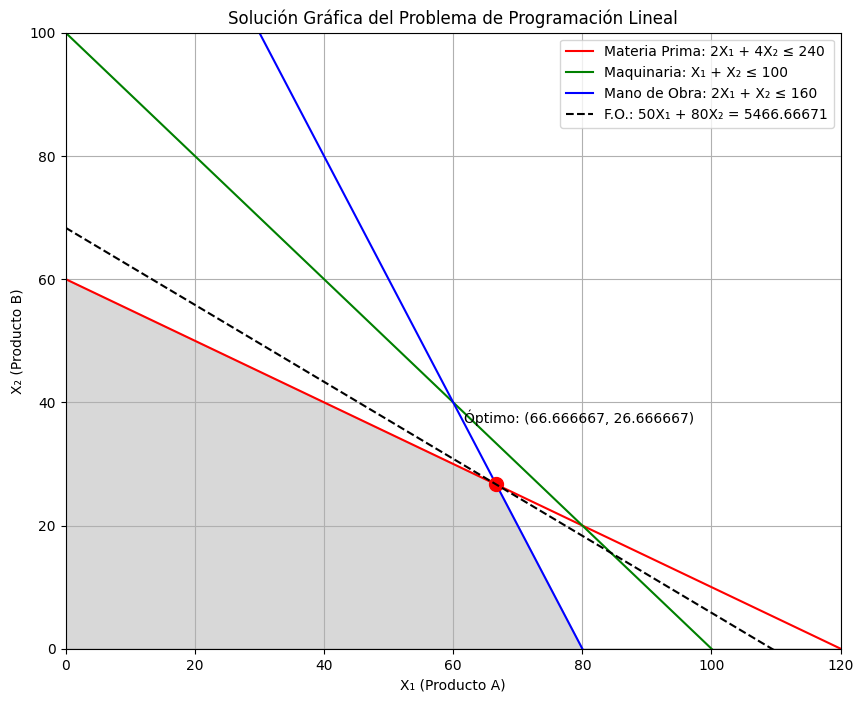


Análisis de Sensibilidad - Restricciones:
Restricción: Materia_Prima
  Valor Actual: 2.00000000916134e-06
  Precio Sombra: 18.333333
  Holgura: -0.0
Restricción: Maquinaria
  Valor Actual: -6.666665999999996
  Precio Sombra: -0.0
  Holgura: 6.666667000000004
Restricción: Mano_Obra
  Valor Actual: 1.0000000081333837e-06
  Precio Sombra: 6.6666667
  Holgura: -0.0


In [5]:
import pulp
import numpy as np
import matplotlib.pyplot as plt

# Definición del problema
problem = pulp.LpProblem("Maximizacion_Beneficio", pulp.LpMaximize)

# Variables de decisión
X1 = pulp.LpVariable("X1", lowBound=0)  # Producto A
X2 = pulp.LpVariable("X2", lowBound=0)  # Producto B

# Función objetivo
problem += 50 * X1 + 80 * X2, "Beneficio"

# Restricciones
problem += 2 * X1 + 4 * X2 <= 240, "Materia_Prima"
problem += X1 + X2 <= 100, "Maquinaria"
problem += 2 * X1 + X2 <= 160, "Mano_Obra"

# Resolviendo el problema
problem.solve()

# Resultados
print("Estado:", pulp.LpStatus[problem.status])
print("Producción óptima:")
print(f"Producto A: {X1.value()} unidades")
print(f"Producto B: {X2.value()} unidades")
print(f"Beneficio máximo: ${pulp.value(problem.objective)}")

# Visualización gráfica
x = np.linspace(0, 120, 1000)

# Restricciones
y1 = (240 - 2 * x) / 4  # Materia Prima
y2 = 100 - x  # Maquinaria
y3 = 160 - 2 * x  # Mano de Obra

# Gráfico
plt.figure(figsize=(10, 8))
plt.plot(x, y1, 'r-', label='Materia Prima: 2X₁ + 4X₂ ≤ 240')
plt.plot(x, y2, 'g-', label='Maquinaria: X₁ + X₂ ≤ 100')
plt.plot(x, y3, 'b-', label='Mano de Obra: 2X₁ + X₂ ≤ 160')

# Región factible
y_min = np.minimum(y1, np.minimum(y2, y3))
y_min[y_min < 0] = 0
x_valid = x[y_min >= 0]
y_valid = y_min[y_min >= 0]

plt.fill_between(x_valid, 0, y_valid, alpha=0.3, color='gray')

# Solución óptima
plt.plot(X1.value(), X2.value(), 'ro', markersize=10)
plt.annotate(f'Óptimo: ({X1.value()}, {X2.value()})',
             xy=(X1.value(), X2.value()),
             xytext=(X1.value()-5, X2.value()+10))

# Línea de nivel de la función objetivo
z_optimal = 50 * X1.value() + 80 * X2.value()
x_level = np.linspace(0, 120, 100)
y_level = (z_optimal - 50 * x_level) / 80
plt.plot(x_level, y_level, 'k--', label=f'F.O.: 50X₁ + 80X₂ = {z_optimal}')

plt.grid(True)
plt.xlabel('X₁ (Producto A)')
plt.ylabel('X₂ (Producto B)')
plt.title('Solución Gráfica del Problema de Programación Lineal')
plt.legend()
plt.xlim(0, 120)
plt.ylim(0, 100)
plt.savefig('solucion_grafica.png')
plt.show()

# Análisis de sensibilidad
sensibilidad = []
for name, constraint in problem.constraints.items():
    sensibilidad.append({
        'Restricción': name,
        'Valor Actual': constraint.value(),
        'Precio Sombra': constraint.pi,
        'Holgura': constraint.slack
    })

print("\nAnálisis de Sensibilidad - Restricciones:")
for item in sensibilidad:
    print(f"Restricción: {item['Restricción']}")
    print(f"  Valor Actual: {item['Valor Actual']}")
    print(f"  Precio Sombra: {item['Precio Sombra']}")
    print(f"  Holgura: {item['Holgura']}")
